<a href="https://colab.research.google.com/github/factorLee/FastCampus/blob/main/KNN_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN(k-Nearest Neighborhood Algorithm) 실습

# 1.데이터, 모듈 불러오기 및 kNN 피팅방법

- 함수 불러오기

- fitting

In [ ]:
from sklearn import neighbors, datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris = datasets.load_iris()

X = iris.data[:, :2] # iris에서 X변수들은 2개만 불러옴
y = iris.target

- 모델 구축

In [ ]:
clf = neighbors.KNeighborsClassifier(5) # k를 5개로 설정
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

# 2.Cross-validation을 활용한 최적의 k찾기

- 함수 불러오기

In [ ]:
from sklearn.model_selection import cross_val_score # cross-validation을 진행해서 score가 높은 것을 얻어 내겠다.

- CV 진행

In [ ]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    knn=neighbors.KNeighborsClassifier(k)
    scores=cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())

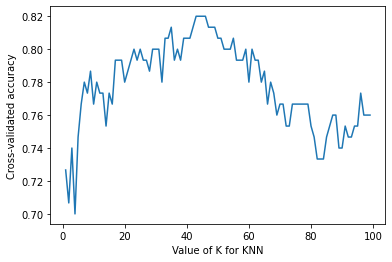

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()
# 증가하다가 감소하는 그래프 => 40~45정도에서 k를 결정하면 된다.

# 2.Weight를 준 kNN

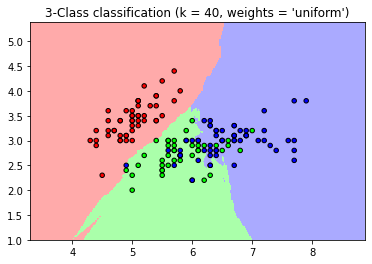

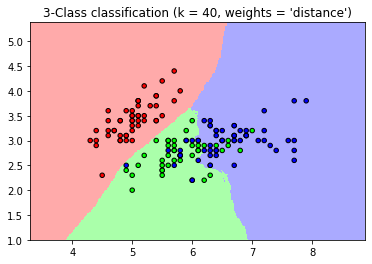

In [ ]:
# knn을 할때, 중심에 더 가까운 애는 weight를 더 많이 주고, 더 멀게 있는 애는 weight를 더 적게 준다.


n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# kNN을 핏팅하면서 weight를 주는 구간
for weights in ['uniform', 'distance']: # uniform weight 안주고 일정, distance가 작을 수록 weight가 크다.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # weight
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

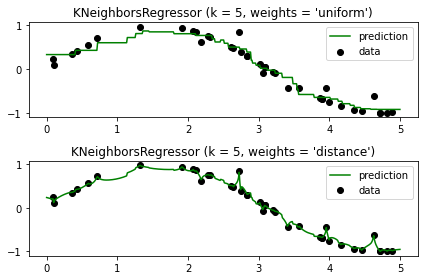

In [ ]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

# uniform 한거에 비해 distance를 준 모델이 더 세세하게 잘 잡아낸걸 확인할 수 있다.
# 모든 모델에서 distance가 좋은건 절대 아니다.
